In [1]:
! pip install seaborn
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


In [5]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
%matplotlib inline

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, mileage, condition, etc.  
    
#### DATASET

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs),
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.


In [6]:
# Importing the dataset using pandas
data = pd.read_csv('data/car_dekho_full.csv')

In [7]:
# Inspecting the dataset using head() method of pandas.DataFrame
data.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


**Which variables are quantitative, and which are categorical?**

In [8]:
categorical_variables = ['Year']
quantitative_variables = ['Current_Selling_Price' , 'MRP' , 'Kms_Driven']


**What are the means and standard deviations for Current_Selling_Price and MRP?**

In [9]:

mean_csp = np.mean(data.Current_Selling_Price.values)
mean_mrp = np.mean(data.MRP.values)
std_csp = np.std(data.Current_Selling_Price.values)
std_mrp = np.std(data.MRP.values)



print (f"The mean Current Selling Price is {mean_csp:.4f} lakhs")
print (f"The mean MRP is {mean_mrp:.4f} lakhs")
print (f"The Standard Deviation of Current Selling Price is {std_csp:.4f}")
print (f"The Standard Deviation of MRP is {std_mrp:.4f}")

The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5146
The Standard Deviation of MRP is 6.4747


**What is the range of Kilometers that the cars have?**

In [10]:
range_of_kms = [np.min(data.Kms_Driven.values), np.max(data.Kms_Driven.values)]
print(f"The range of Kilometers that the cars have is from {range_of_kms[0]:.4f} kilometers to {range_of_kms[1]:.4f} kilometers")

The range of Kilometers that the cars have is from 500.0000 kilometers to 213000.0000 kilometers


**The goal of this part is to identify the best variable from which to predict our respone variable Current Selling Price. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and Current_Selling_Price. Based on the plots, which is the predictor that visually seem to best predict the Current_Selling_Price?**

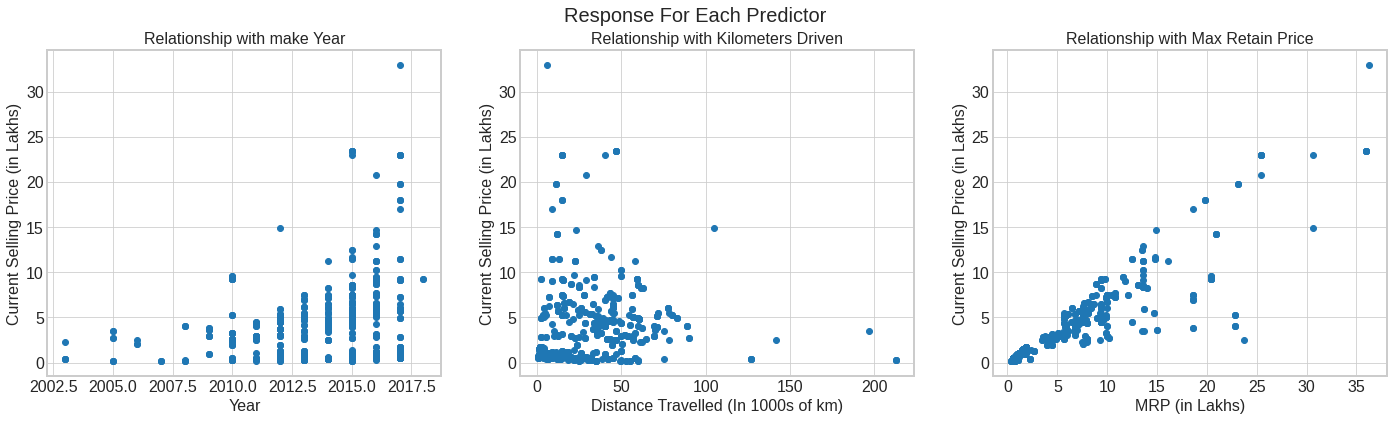

In [14]:
Response = data.Current_Selling_Price.values
P1 = data.Year.values
P2 = data.Kms_Driven.values
P2 = P2/1000
P3 = data.MRP.values



fig, axis = plt.subplots(1, 3, figsize=(24,6))

axis[0].scatter(P1, Response)
axis[0].set_title("Relationship with make Year")
axis[0].set_xlabel("Year")
axis[0].set_ylabel("Current Selling Price (in Lakhs)")

axis[1].scatter(P2, Response)
axis[1].set_title("Relationship with Kilometers Driven")
axis[1].set_xlabel("Distance Travelled (In 1000s of km)")
axis[1].set_ylabel("Current Selling Price (in Lakhs)")
  
axis[2].scatter(P3, Response)
axis[2].set_title("Relationship with Max Retain Price")
axis[2].set_xlabel("MRP (in Lakhs)")
axis[2].set_ylabel("Current Selling Price (in Lakhs)")


plt.suptitle('Response For Each Predictor',fontsize=20)

plt.show()    

As seen from the graph above the predictor "MRP" seems to best predict the "Current Selling Price".

Now we will model a kNN regression on the predictor chosen above and the response variable `Current_Selling_Price`.

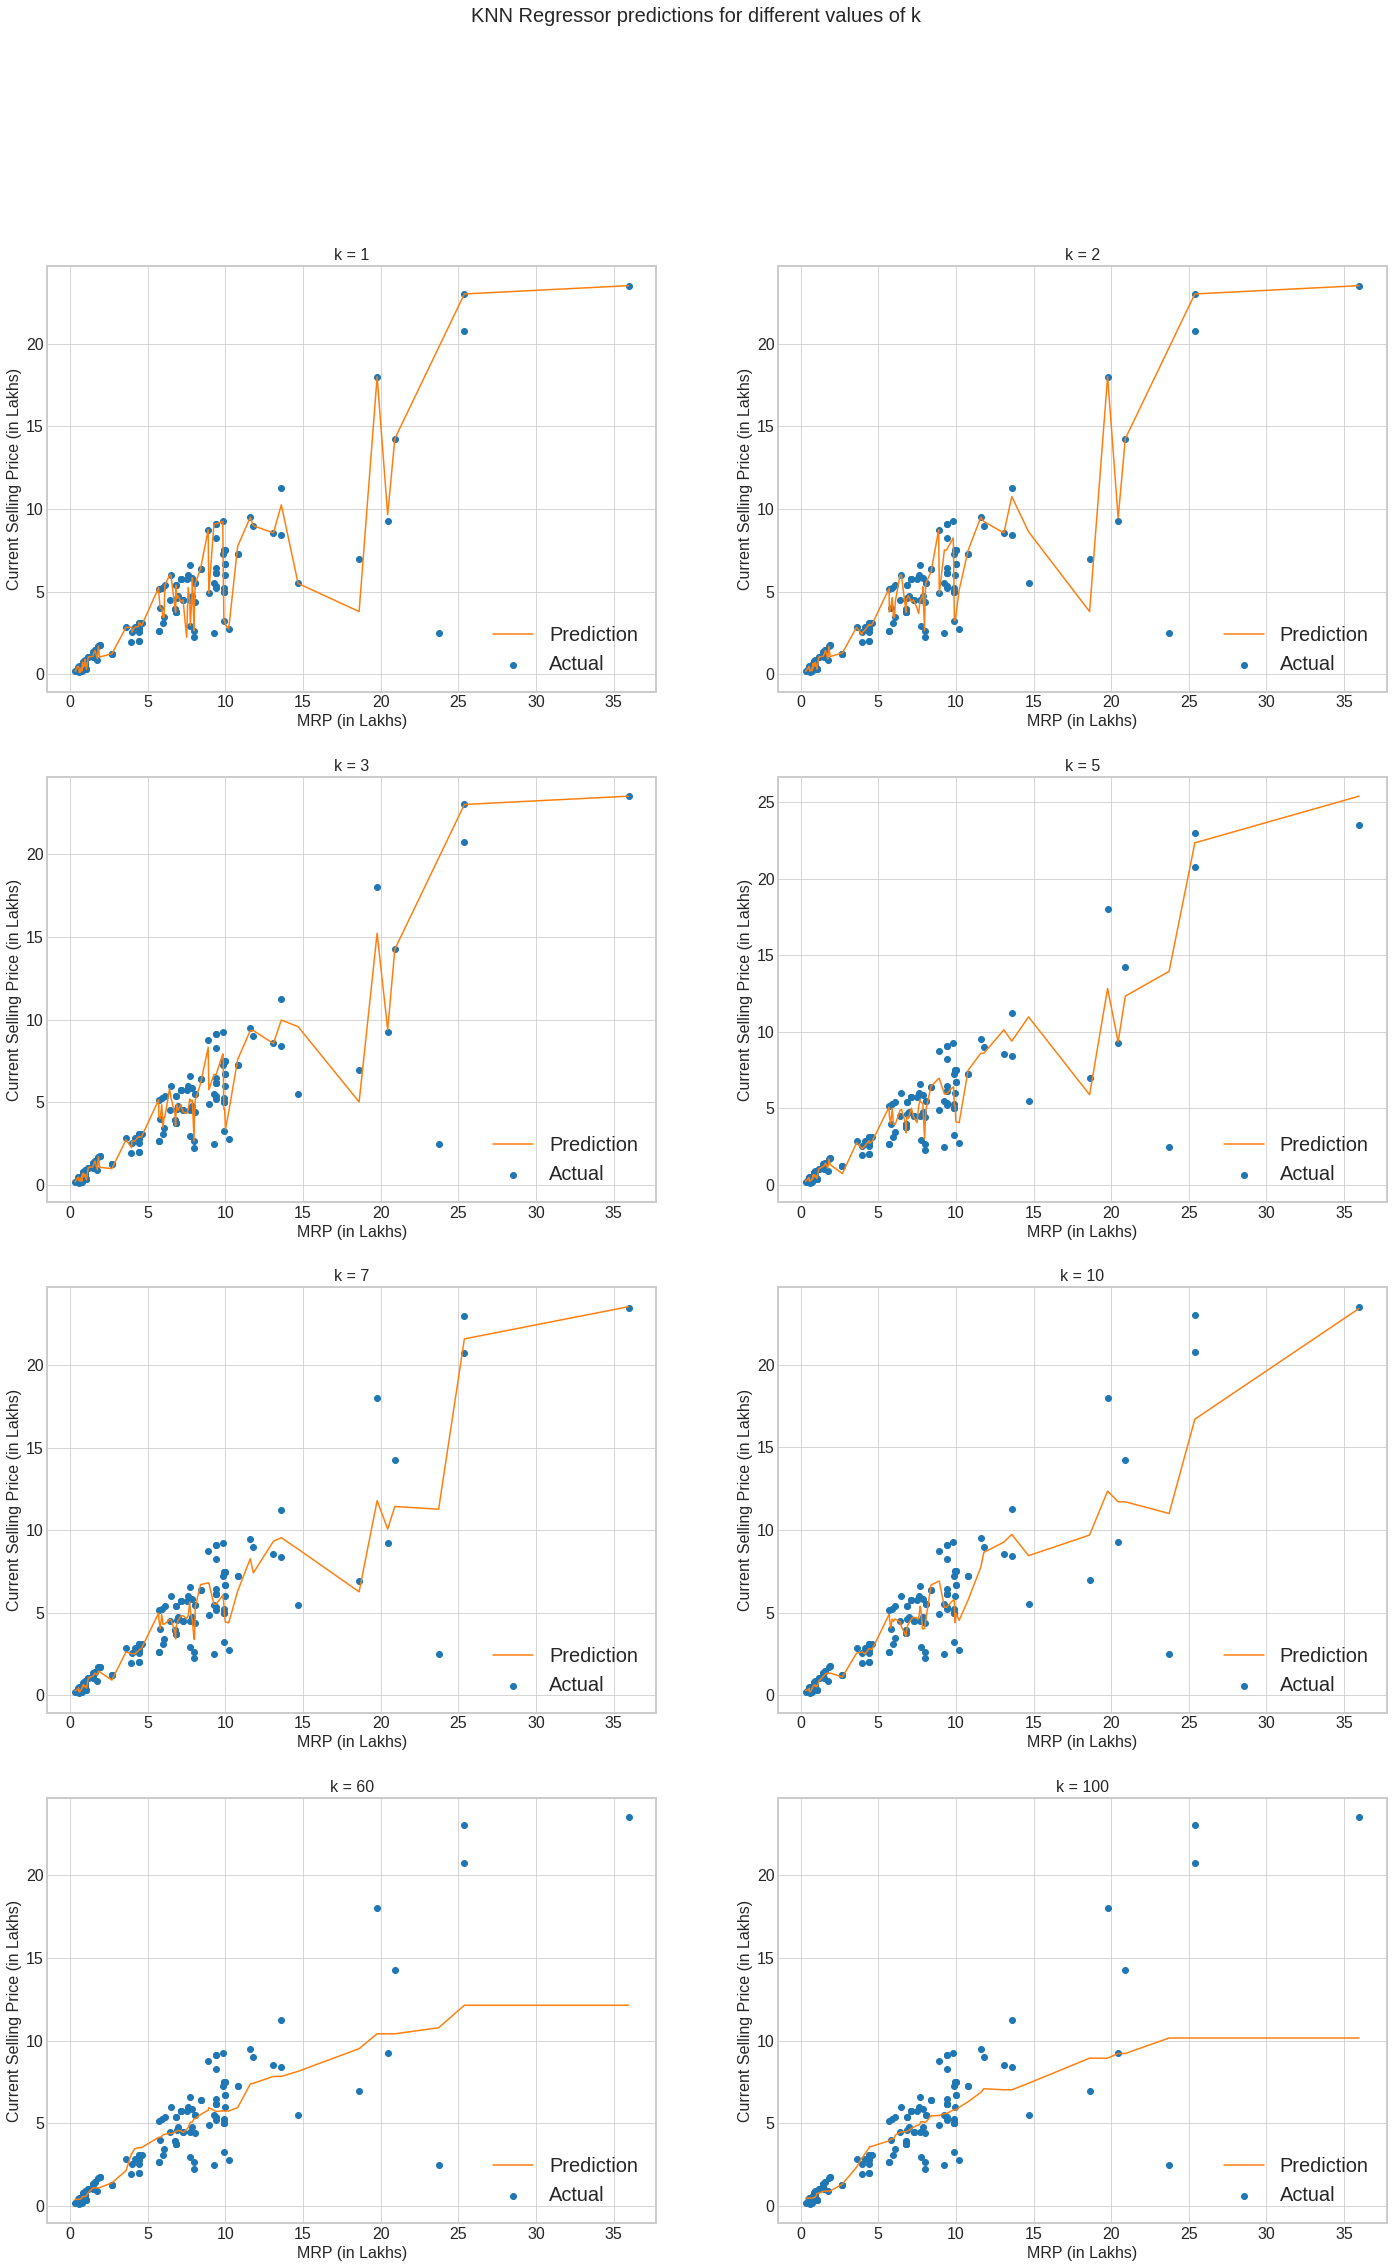

In [15]:

X = data[["MRP"]]  
y = Response

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=109)  

## Fitting a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,60,100 .
k_values = [1, 2, 3, 5, 7, 10, 60, 100]
predictions_train = []
predictions_test = []
fig, axis = plt.subplots(4, 2, figsize=(24,36), squeeze=True)
i = 0
sort_index = np.argsort(X_test.MRP.values)
for k in k_values:
    
    model = KNeighborsRegressor(k)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    predictions_train.append(list(y_pred_train))
    predictions_test.append(list(y_pred_test))

    if i < 2:
        axis[0, i].plot(X_test.MRP.values[sort_index], y_pred_test[sort_index],color='tab:orange')
        axis[0, i].scatter(X_test, y_test)
        axis[0, i].set_title(f"k = {k}")
        axis[0, i].set_xlabel("MRP (in Lakhs)")
        axis[0, i].set_ylabel("Current Selling Price (in Lakhs)")
        axis[0, i].legend(["Prediction","Actual"],loc='lower right',fontsize=20)

    elif i < 4:
        axis[1, i-2].plot(X_test.MRP.values[sort_index], y_pred_test[sort_index],color='tab:orange')#scatter(X_test, y_pred)
        axis[1, i-2].scatter(X_test, y_test)
        axis[1, i-2].set_title(f"k = {k}")
        axis[1, i-2].set_xlabel("MRP (in Lakhs)")
        axis[1, i-2].set_ylabel("Current Selling Price (in Lakhs)")
        axis[1, i-2].legend(["Prediction","Actual"],loc='lower right',fontsize=20)

    elif i < 6:
        axis[2, i-4].plot(X_test.MRP.values[sort_index], y_pred_test[sort_index],color='tab:orange')#scatter(X_test, y_pred)
        axis[2, i-4].scatter(X_test, y_test)
        axis[2, i-4].set_title(f"k = {k}")
        axis[2, i-4].set_xlabel("MRP (in Lakhs)")
        axis[2, i-4].set_ylabel("Current Selling Price (in Lakhs)")
        axis[2, i-4].legend(["Prediction","Actual"],loc='lower right',fontsize=20)

    
    else:
        axis[3, i-6].plot(X_test.MRP.values[sort_index], y_pred_test[sort_index], color='tab:orange')
        axis[3, i-6].scatter(X_test, y_test)
        axis[3, i-6].set_title(f"k = {k}")
        axis[3, i-6].set_xlabel("MRP (in Lakhs)")
        axis[3, i-6].set_ylabel("Current Selling Price (in Lakhs)")
        axis[3, i-6].legend(["Prediction","Actual"],loc='lower right',fontsize=20)

    i = i + 1

plt.suptitle('KNN Regressor predictions for different values of k',fontsize=20)
plt.show()




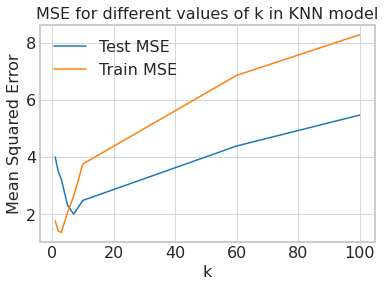

In [16]:
# Creating the MSE plot

mse_train_list = []
mse_test_list = []
for k in range(len(k_values)):
    mse_train_list.append(mean_squared_error(y_train, predictions_train[k]))
    mse_test_list.append(mean_squared_error(y_test, predictions_test[k]))

plt.plot(k_values, mse_test_list)
plt.plot(k_values, mse_train_list)
plt.title('MSE for different values of k in KNN model')
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.legend(['Test MSE','Train MSE'])
sns.set_style('dark')
plt.show()


In [17]:
# Find the best model based on MSE

best_k = k_values[mse_test_list.index(np.min(mse_test_list))]
best_mse = np.min(mse_test_list)
print(f"The best model based on lowest MSE in Test set is {best_k} having an MSE value of {best_mse:.4f}")


The best model based on lowest MSE in Test set is 7 having an MSE value of 2.0048


In [18]:
##Computing the R-squared for the best model

y_test_7 = predictions_test[mse_test_list.index(np.min(mse_test_list))]
r2 = r2_score(y_test, y_test_7)
print(f'R squred for the best model is {r2:.4f}')

R squred for the best model is 0.8755


**a) How does the value of $k$ affect the fitted model?**
<br />
**Ans)** On incresing the k values the graph seems to have less fluctuations i.e., starts to look more smooth but this results in wrong predictions and increases after a certain k value.

**b) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**
<br />
**Ans)** Such a model will give same predictions for any point as for any predictor point the model will take into account all the n points of the dataset and there will be no difference in the calculations for predicting any predictor point.

**c) Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.**
<br />
**Ans)** Yes the training and test plot exhibits the same trends i.e., they both initially decrease for lower k values , reach a minimum and then keep on incresing for higher k values. If the k value is selected to be too large, the model becomes too generalized and fails to accurately predict in both train and test sets. This situation is known as underfitting. Similarly if the k value is selected to be too small the model becomes too specific and fails to predict in both train and test sets. This is known as over-fitting.

**d) Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?**
<br />
**Ans)** No we don't always get the same answer as while the training the model it now sees different data points and gives different predictions for the train and test sets which in turn generates different mse for the same k values. However the trend of the MSE vs k remains the same


**Predict the selling price**

In [19]:
# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=106)

# Intializing Linear Regression model

lreg = LinearRegression(fit_intercept=True)

# Fitting the model on train data

lreg.fit(X_train, y_train)

# Soring the weights (coefficients) and biases (intercept) of the model
coefficient = lreg.coef_
intercept = np.array(lreg.intercept_)
print(f"The linear model has a slope of {coefficient[0]:.4f} and inctercept of {intercept:.4f}")


# Predicting the target values using the model on the train and test set
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

# Calculating the Loss function (MSE and r2 in this case)

MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"The MSE for training set is {MSE_train:.4f} \nThe MSE for Test set is {MSE_train:.4f} \nThe R squared score for the model is {r2:.4f}")

The linear model has a slope of 0.6351 and inctercept of 0.0561
The MSE for training set is 4.2951 
The MSE for Test set is 4.2951 
The R squared score for the model is 0.7779


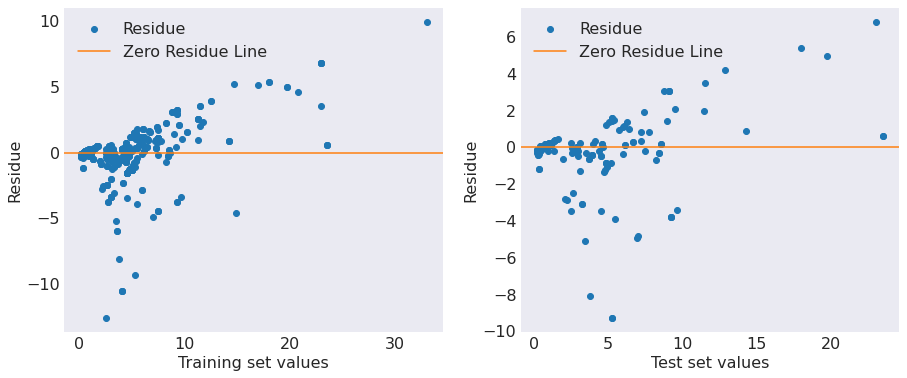

In [20]:
# Visulalizing the residuals with the zero residue line


residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred
fig, ax = plt.subplots(1, 2, figsize=(15,6),squeeze=True)
sort_index_train = np.argsort(y_train)
ax[0].scatter(y_train[sort_index_train],residuals_train[sort_index_train])
ax[0].set_xlabel("Training set values")
ax[0].set_ylabel("Residue")
ax[0].axhline(y = 0, color = 'tab:orange')
ax[0].legend(['Residue', 'Zero Residue Line'])
sort_index_test = np.argsort(y_test)
ax[1].scatter(y_test[sort_index_test], residuals_test[sort_index_test])
ax[1].set_xlabel("Test set values")
ax[1].set_ylabel("Residue")
ax[1].axhline(y = 0, color = 'tab:orange')
ax[1].legend(['Residue', 'Zero Residue Line'])

sns.set_style('dark')
plt.show()

***Discussion :***
<br />
The shape here looks like linear in nature with a positive slope. This means that the Residue i.e., difference between predicted and actual value keeps on incresing with the predictor value. We can conclude that the the quality of the model will be bad for higher values for predictor variables. Even for low value of predictoers there are fluctuations i.e., residues are taking values above and below the zero residue line but that is fine as long as the their distance from the 0 residue line is small. But in our graph the distance is also high. Hence we can say our model did rather poorly at low predictor values as well.



<br />
The test MSE score of our linear regression model is more that double than that of the best test MSE value obtained from KNN regression. Hence our model did very poorly as compared to KNN regression.


<br />
The sign of the slope of the fitted linear model informs us about the nature of the relationship between predictor and response variables. A positive slope indicates that the we get an increse in the response upon increasing the predictor and vice-versa. A negative slope indicates that we will get an increase in response upon decresing the predictor and vice-versa.

<br />**
Based on the shape of the residual plot we can conclude tha the assumption of linearity is not valid for this data as the residual seem to have a positive relationship with the value of data points i.e., the residue incresases with increase in predictor variable indicating that model will keep on giving higher residue for larger predictor value. So we can conclude that the true nature must be of a higher degree polynomial than linear.

